In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [89]:
excel_file = './rawData/TestData.xlsx'

In [90]:
output_dir = './proccessedData/'
os.makedirs(output_dir, exist_ok=True)

In [91]:
dataDict = pd.read_excel(excel_file, sheet_name=None)

In [157]:
overview = pd.DataFrame()
# overview.set_index("test set", inplace=True)

In [158]:
overview

""


In [159]:
for test, data in dataDict.items():
    actualAvg = np.average(data["actual"])
    deviceAvg = np.average(data["device"])
    proccessedData = {
        "actual mean": actualAvg,
        "device mean": deviceAvg,
        "actual S.D.": np.std(data["actual"]),
        "device S.D.": np.std(data["device"]),
        "offset": actualAvg - deviceAvg,
    }
    # overview["t1"] = [,36.450, 32.769286, 0.150000, 0.362027, 3.680714]
    overview[test] = proccessedData

In [160]:
overview

,t1,t2
actual mean,36.450000,36.375000
device mean,32.769286,32.418750
actual S.D.,0.150000,0.195256
device S.D.,0.362027,0.491806
offset,3.680714,3.956250


In [164]:
for test, testData in dataDict.items():
    testData["offset"] = testData["device"] + overview.loc["offset"][test]

In [167]:
dataDict["t1"]

,actual,device,offset
0,36.5,32.44,36.120714
1,36.5,32.75,36.430714
2,36.5,32.00,35.680714
3,36.6,32.63,36.310714
4,36.5,32.94,36.620714
5,36.5,33.31,36.990714
6,36.5,33.50,37.180714
7,36.6,32.94,36.620714
8,36.1,32.50,36.180714
9,36.4,32.75,36.430714


<Axes: title={'center': 'T2'}, xlabel='Time', ylabel='Temp'>

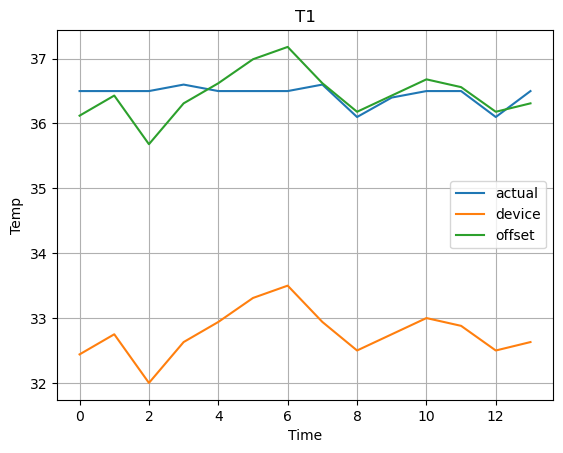

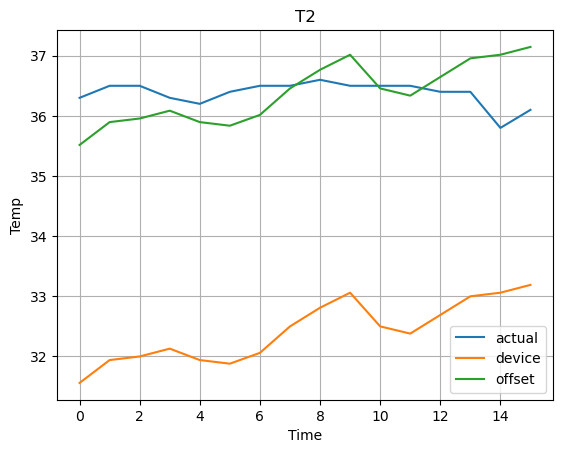

In [169]:
dataDict["t1"].plot(title="T1", xlabel="Time", ylabel="Temp", grid=True, legend=True)
dataDict["t2"].plot(title="T2", xlabel="Time", ylabel="Temp", grid=True, legend=True)

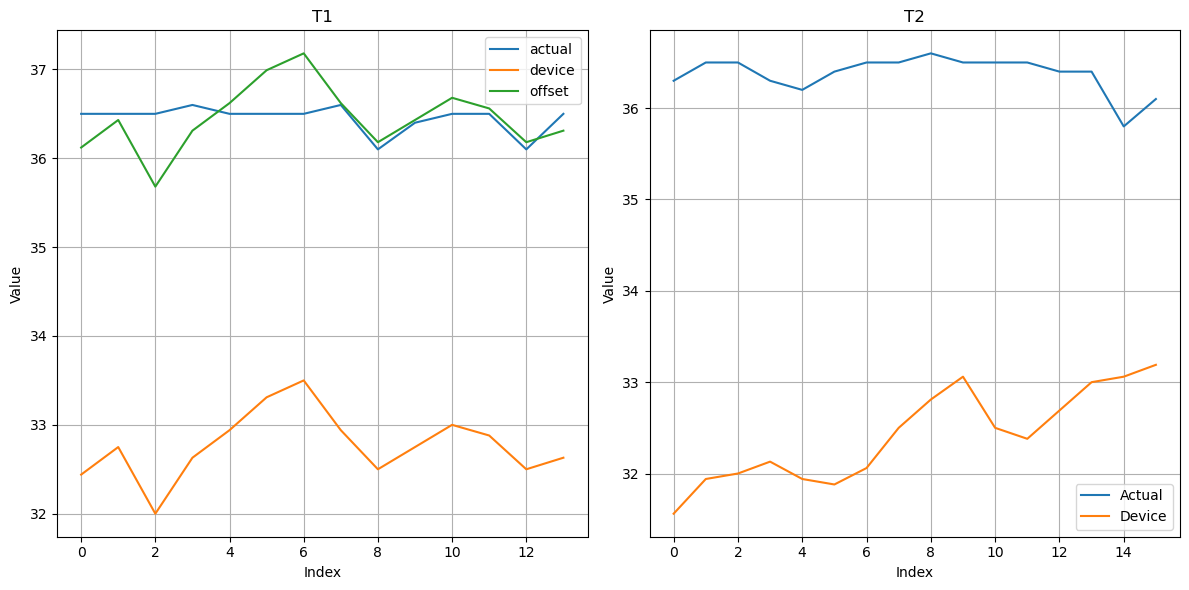

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for t1
axes[0].plot(dataDict["t1"])
axes[0].set_title("T1")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")
axes[0].legend(dataDict["t1"].columns)
axes[0].grid(True)

# Plot for t2
axes[1].plot(dataDict["t2"]["actual"], label="Actual")
axes[1].plot(dataDict["t2"]["device"], label="Device")
axes[1].set_title("T2")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Value")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()